In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ImageDraw
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv('10fold/pneumonia-test-0.csv', sep=';')
data2 = pd.read_csv('10fold/pneumonia-train-0.csv', sep=';')
data = data.append(data2, ignore_index=True)
data.reset_index(inplace=True, drop=True)
data['center_x'] = data['x'] + data['width'] / 2
data['center_y'] = data['y'] + data['height'] / 2
data_empty = data.loc[data['Target'] == 0]
data_bbox = data.loc[data['Target'] == 1]

In [3]:
def draw_rectangle(image, x_min, y_min, width, height, inner_color=None, out_color='yellow',
                   size=1):
    draw = ImageDraw.Draw(image)
    coordinates = [x_min, y_min, x_min + width + 1, y_min + height + 1]
    draw.rectangle(xy=coordinates, width=size, outline=out_color, fill=inner_color)
    return image

def draw_mask(image, x_min, y_min, width, height):
    draw = ImageDraw.Draw(image)
    coordinates = [x_min, y_min, x_min + width + 1, y_min + height + 1]
    draw.rectangle(xy=coordinates, width=0, outline=None, fill='white')
    return image

def show_grid(images, images_per_line=3):
    #creates a new empty image, RGB mode, and size 400 by 400.
    width, height = images[0].size
    num_lines = int(np.ceil(len(images) / images_per_line))
    grid_width = int(width * images_per_line)
    grid_height = int(height * num_lines)
    background = Image.new('RGB', (grid_width, grid_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    for i in range(num_lines):
        for j in range(images_per_line):
            idx = i * images_per_line + j
            image = images[idx]
            x = j * width
            y = i * height
            #paste the image at location i,j:
            background.paste(image, (x,y))
    
    return background

def double_gaussian(dataframe_column):
    return GaussianMixture(n_components=2).fit(dataframe_column.to_numpy().reshape(-1, 1))

def display_double_gaussian(distribution):
    means_hat = distribution.means_.flatten()
    weights_hat = distribution.weights_.flatten()
    sds_hat = np.sqrt(distribution.covariances_).flatten()
    
    print(distribution.converged_)
    print(means_hat)
    print(sds_hat)
    print(weights_hat)
    
    base = np.linspace(0, 1024, 100)
    return plt.plot(base, np.exp(distribution.score_samples(base[:, np.newaxis])))

True
[713.72667475 321.06830316]
[59.71687089 61.28061072]
[0.46405507 0.53594493]


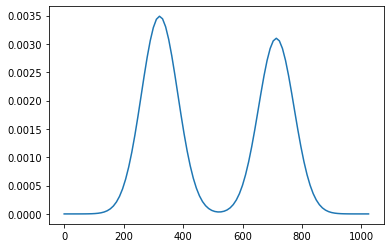

In [4]:
image_dir = 'images/train'
patients_bbox = ['0174c4bb-28f5-41e3-a13f-a396badc18bd',
                 '01fa0f5e-00c3-41cb-b5c7-10600c8633ae',
                 '040a0743-f663-4746-8224-f0e3bacc7ba5',
                 '0499513a-5d48-4cf9-aac8-115e2a52fe1a',
                 '0587782c-ac6b-4ae1-8ffb-ce894d09f75e',
                 '05bb6f8d-453b-4e56-ae92-2600e058ba65',
                 '05fe7d73-5c8c-4349-88c4-2071a00d6d81',
                 '0637b804-e693-48d1-8716-f7c63ce6162a',
                 '06d5a58d-baf1-4937-bfc3-00db1fb2b1be',
                 '06e09ebb-cb5b-4c30-8d3a-67a6ec34692b',
                 '06f5a38a-e4b1-4e5f-8c62-f48630a52504',
                 '077780cb-eb05-478f-a7d7-f0576e4c34df',
                 '0808c4af-9ed6-46e3-a936-2cafb0004e6a',
                 '08307845-ccbd-4616-b8e9-58532a766dbe',
                 '08f17660-dc61-4a5d-b6fb-10dacc1e20a2',
                 '091cc2b7-8ba6-4fce-8ae2-7547117dbddf',
                 '091d75a8-e23e-4cb8-af67-10cb314077ec',
                 '0927e819-9640-487d-a04e-f5d4732dbe0a',
                 '0a8d486f-1aa6-4fcf-b7be-4bf04fc8628b',
                 '0a8efdc1-1dff-4d65-8948-c56a5d74a906']
patients_empty = ['006cec2e-6ce2-4549-bffa-eadfcd1e9970',
                 '008c19e8-a820-403a-930a-bc74a4053664',
                 '01b56434-4dd9-4994-bcc5-0b70a36e415a',
                 '01cc7c75-4498-43ab-b650-5553d0507f76',
                 '0385fdea-9b37-4039-b10c-d3094f6afdfa',
                 '03d00867-fe6d-47b5-9a14-3f03f736e69a',
                 '041bf0ac-a841-4c4a-9f91-45f4b3b34671',
                 '052e09c0-6747-4f72-8e71-96fcc489043a',
                 '05d16b06-ffb2-40ab-b64a-299448999f72',
                 '05f42ea0-fa18-47ba-80a7-e070307300bf',
                 '062374a3-6ca1-48d2-aa3c-820053773b54',
                 '0638126f-126f-4f53-befe-538ff87597c6',
                 '065b3a2f-1af3-4ebd-a740-9e49f9c685db',
                 '068ae297-8397-463e-927e-cb6693aeb8b5',
                 '0693cf18-a4e1-408a-a5b2-f4cabfe169d3',
                 '06bc1cfe-23a0-43a4-a01b-dfa10314bbb0',
                 '06e1a29a-6307-4ec2-902e-b379d39d2101',
                 '0716e0cf-3822-406e-bfb2-c064cd471019',
                 '0717d112-a8e5-46c0-9ba5-902cd9fe8fe1',
                 '07444c7a-580b-4494-a883-3b33361a24ac']
center_x_dist = double_gaussian(data_bbox['center_x'])
display_double_gaussian(center_x_dist)

Generates single box

In [5]:
output_dir = 'images/only_masks/single_box'

filelist = os.listdir(image_dir)
for filename in filelist:
    # gets bboxes from a image
    name = os.path.basename(filename)
    boxes = data.loc[data['patientId'] == name[:-4]]
    if len(boxes) > 1:
        target = boxes.iloc[0]['Target']
    else:
        target = boxes['Target'].iloc[0]
    image = Image.open(os.path.join(image_dir, name))
    img_width, img_height = image.size
    image = Image.new(mode='RGB', size=(img_width, img_height), color='black')
    # image = Image.new(mode='RGB', size=(img_width, img_height), color='black')
    if target > 0:
        x_min = boxes.iloc[0]['x']
        y_min = boxes.iloc[0]['y']
        x_max = boxes.iloc[0]['x'] + boxes.iloc[0]['width']
        y_max = boxes.iloc[0]['y'] + boxes.iloc[0]['height']
        for j in range(len(boxes)):
            example = boxes.iloc[j]
            if x_min > example['x']:
                x_min = example['x']
            if y_min > example['y']:
                y_min = example['y']
            if x_max < example['x'] + example['width']:
                x_max = example['x'] + example['width']
            if y_max < example['y'] + example['height']:
                y_max = example['y'] + example['height']
            
        image = draw_rectangle(image=image,
                              x_min=x_min,
                              y_min=y_min,
                              width=x_max - x_min,
                              height=y_max - y_min,
                               inner_color='white',
                               out_color=None)
    else: 
        size = np.random.randint(567)
        if size < 317:  # case boxes on both lungs
            x_center = np.random.normal(loc=521.238170,
                                        scale=56.974727)
            y_center = np.random.normal(loc=532.476341,
                                        scale=102.039171)
            width = np.random.normal(loc=607.864353,
                                     scale=90.521505)
            height = np.random.normal(loc=419.230284,
                                      scale=149.757295)
        else:  # case single box on one lung
            x_center = center_x_dist.sample()[0][0]
            y_center = np.random.normal(loc=549.622000,
                                        scale=117.287902)
            width = np.random.normal(loc=207.600000,
                                     scale=62.610737)
            height = np.random.normal(loc=254.948000,
                                      scale=129.575896)
        width = int(width)
        height = int(height)
        x_min = int(x_center - width/2)
        x_max = int(x_center + width/2)
        y_min = int(y_center - height/2)
        y_max = int(y_center + height/2)
        if x_min < 0:
            width += x_min
            x_min = 0
        if x_max > 1023:
            width -= (x_max - 1023)
        if y_min < 0:
            height += height
            y_min = 0
        if y_max > 1023:
            height -= y_max - 1023
        image = draw_rectangle(image=image,
                               x_min=x_min,
                               y_min=y_min,
                               width=width,
                               height=height,
                               inner_color='white',
                               out_color=None)

    image.save(os.path.join(output_dir, name[:-4] + '.png'))

Sem nada

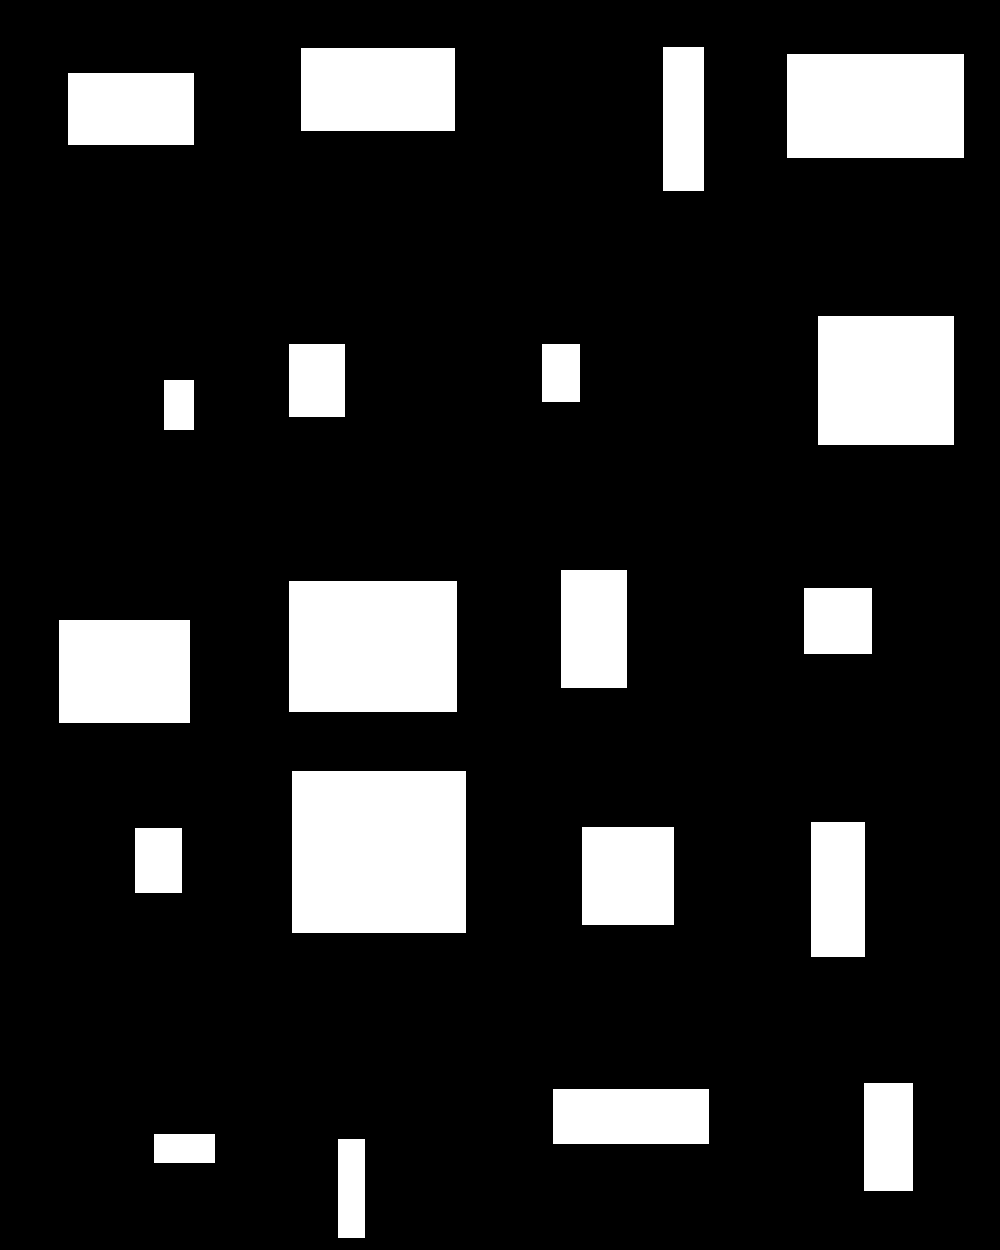

In [6]:
images = []
for patientId in patients_empty:
    image = Image.open(os.path.join(output_dir, f"{patientId}.png"))
    images.append(image)
show_grid(images, images_per_line=4).resize((4 * 250, 5 * 250))

Pneumonia

In [7]:
images = []
for patientId in patients_bbox:
    image = Image.open(os.path.join(output_dir, f"{patientId}.png"))
    images.append(image)
show_grid(images, images_per_line=4).resize((4 * 250, 5 * 250))

FileNotFoundError: [Errno 2] No such file or directory: 'images/only_masks/single_box/0174c4bb-28f5-41e3-a13f-a396badc18bd.png'

double box

In [8]:
print(len(data))
print(data.loc[data['patientId'] == 'ff65ded6-dcb8-4e16-a3d2-50b5393bcfa7'])
output_dir = 'images/only_masks/double_box'
for filename in os.listdir(image_dir):
    # gets bboxes from a image
    name = os.path.basename(filename)
    boxes = data.loc[data['patientId'] == name[:-4]]
    if len(boxes) > 1:
        target = boxes.iloc[0]['Target']
    else:
        target = boxes['Target'].iloc[0]
    image = Image.open(os.path.join(image_dir, name))
    img_width, img_height = image.size
    image = Image.new(mode='RGB', size=(img_width, img_height), color='black')
    if target > 0:
        print(name, boxes)
        for i in range(len(boxes)):
            example = boxes.iloc[i]
            x_min = example['x']
            y_min = example['y']
            x_max = example['x'] + example['width']
            y_max = example['y'] + example['height']
            image = draw_rectangle(image=image,
                                  x_min=x_min,
                                  y_min=y_min,
                                  width=x_max - x_min,
                                  height=y_max - y_min,
                                   inner_color='white',
                                   out_color=None)
    else: 
        size = np.random.randint(567)
        if size < 317:  # case boxes on both lungs
            num_boxes = 2
        else:  # case single box on one lung
            num_boxes = 1
        
        for _ in range(num_boxes):
            x_center = center_x_dist.sample()[0][0]
            y_center = np.random.normal(loc=537.500556,
                                        scale=116.629607)
            width = np.random.normal(loc=213.986667,
                                     scale=57.777024)
            height = np.random.normal(loc=316.087778,
                                      scale=149.867380)
            width = int(width)
            height = int(height)
            x_min = int(x_center - width/2)
            x_max = int(x_center + width/2)
            y_min = int(y_center - height/2)
            y_max = int(y_center + height/2)
            if x_min < 0:
                width += x_min
                x_min = 0
            if x_max > 1023:
                width -= (x_max - 1023)
            if y_min < 0:
                height += height
                y_min = 0
            if y_max > 1023:
                height -= y_max - 1023
            image = draw_rectangle(image=image,
                                   x_min=x_min,
                                   y_min=y_min,
                                   width=width,
                                   height=height,
                                   inner_color='white',
                                   out_color=None)

    image.save(os.path.join(output_dir, name[:-4] + '.png'))

30227
                                  patientId   x   y  width  height  Target  \
29042  ff65ded6-dcb8-4e16-a3d2-50b5393bcfa7 NaN NaN    NaN     NaN       0   

       center_x  center_y  
29042       NaN       NaN  
0927e819-9640-487d-a04e-f5d4732dbe0a.png                                patientId      x      y  width  height  Target  \
64  0927e819-9640-487d-a04e-f5d4732dbe0a  536.0  336.0  226.0   262.0       1   

    center_x  center_y  
64     649.0     467.0  
b24bde0d-d372-4522-b8bb-0fbc770b80ac.jpg                                  patientId      x      y  width  height  \
1842  b24bde0d-d372-4522-b8bb-0fbc770b80ac  413.0  295.0  265.0   461.0   
1843  b24bde0d-d372-4522-b8bb-0fbc770b80ac   68.0  293.0  240.0   451.0   

      Target  center_x  center_y  
1842       1     545.5     525.5  
1843       1     188.0     518.5  
b1323e3e-2460-4db7-a98e-f810c0004836.jpg                                   patientId      x      y  width  height  \
20101  b1323e3e-2460-4db7-a98e-f810c00

Sem nada

In [ ]:
images = []
for patientId in patients_empty:
    image = Image.open(os.path.join(output_dir, f"{patientId}.png"))
    images.append(image)
show_grid(images, images_per_line=4).resize((4 * 250, 5 * 250))

Pneumonia

In [ ]:
images = []
for patientId in patients_bbox:
    image = Image.open(os.path.join(output_dir, f"{patientId}.png"))
    images.append(image)
show_grid(images, images_per_line=4).resize((4 * 250, 5 * 250))